In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 로이터 기사 데이터 셋 로딩

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(8982,)

In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index =  dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[0]

3

In [ ]:
# 데이터 준비

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

# 데이터 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
# 라벨 데이터의 엔코딩 : 실제 사용x

def to_one_hot(labels, dimension=46): # 토픽 갯수 46
  results = np.zeros((len(labels),dimension))

  for i, sequence in enumerate(labels):
    results[i, sequence] = 1

  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
# categorical 데이터로 변환 : 실제 사용o

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
ine_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 신경망 구성

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 몇 번째 토픽인지 맞추기

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',    # 다중일 때 사용하는 손실함수
              metrics=['accuracy'])      #분류 문제에선 정확도가 제일 중요.

In [ ]:
# 훈련 데이터의 준비

x_val = X_train[:1000]  # 앞부분 1000개
partial_X_train = X_train[1000:]  # 뒷부분 1000개
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))
                    # 학습용 데이터, 라벨값, 20번, 베치값, 변측값

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.5874 - accuracy: 0.5303 - val_loss: 1.6635 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.3595 - accuracy: 0.7121 - val_loss: 1.2530 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 1s 58ms/step - loss: 1.0082 - accuracy: 0.7889 - val_loss: 1.1027 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.7969 - accuracy: 0.8290 - val_loss: 1.0046 - val_accuracy: 0.8010
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.6318 - accuracy: 0.8667 - val_loss: 0.9498 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 58ms/step - loss: 0.5038 - accuracy: 0.8951 - val_loss: 0.9217 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 59ms/step - loss: 0.4146 - accuracy: 0.9117 - val_loss: 0.8827 - val_accuracy: 0.8070
Epoch 8/20
16

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

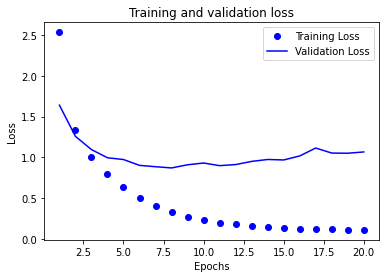

In [ ]:
# 결과 시각화

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

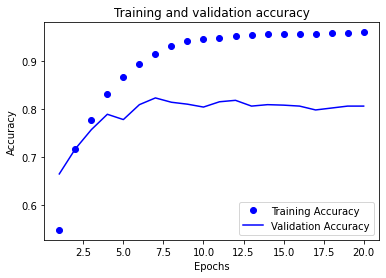

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')    # 학습 정확도만으로는 아무것도 검증되지 않는다.
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()